http://www2.cao.ie/points/l8.php

***
'PHP' indicates that the webpage has been programmed using PHP, a server side scripting language.

# Clear and concise overview of how to load CAO points info from the CAO website into a PANDAS dataframe

In [1]:
#convenient http requests
import requests as rq

# regular expressions
import re

#dates and times
import datetime as dt

# for dataframes import pandas
# v useful to get data from spreadsheets
import pandas as pd

#for downloading files to python
import urllib.request as urlrq

import warnings;
warnings.filterwarnings('ignore');


In [2]:
#now = dt.datetime.now()

In [3]:
#datetime function has a data structure called datetime
#field for time, day ,month etc
#dt.datetime.now()
now = dt.datetime.now()
now

datetime.datetime(2021, 12, 28, 19, 25, 23, 768718)

In [4]:
# format now as a string
#if have datetimestamp as separate and unique at the start of the notebook
# then potentially can overwrite but on positive side all files 
# created in logbook run will have the same datetimestamp so neater and can track
#2020 datafile saved as'now' file is equivalent to corresponding 2021 saved as same'now' etc
nowstr = now.strftime('%Y%m%d_%H%M%S')

In [5]:
print(now)

2021-12-28 19:25:23.768718


# 2021 points

http://www2.cao.ie/points/l8.php

***


In [6]:
# fetch the CAO points URL
# resp= response from the URL
# rq= request library
# get= get the url (NB: gets the HTTP version!)
resp_2021 = rq.get ('http://www2.cao.ie/points/l8.php')
#have a quick peek
resp_2021
# resp [200] means html response is in order.  [404] if returns means it is not found .  These are http codes

<Response [200]>

## Save the original dataset
#### use the current time (changed to str above) as a filename

In [7]:
# good programmers use only alphanumeric characters,dash and dot in file names
#create a filepath for the original data
#use year at start to ensure alphabetic sorted when filed
# below creates the EMPTY html file and saves it in a new 'data' folder in active location  ie. \repo\Fun_of..
path2021html = 'data/cao2021_' + nowstr + '.html'

### the server uses the wrong encoding fix it before saving

In [8]:
#RESP = RESPONSE
#'resp.text' takes the response and converts it to text- but still has original errors
#thus not best way to save THIS original file
#but resp.text is a typical way to save

In [9]:
# The server uses the wrong encoding, fix it
original_encoding = resp_2021.encoding

# Change to cp1252
resp_2021.encoding = 'cp1252'

In [10]:
#save the original html file:
# using the updated coding cp1252 as a TEXT file
#this file is not used in the regular expression script but saved as a record 

with open(path2021html, 'w') as f:
    f.write(resp_2021.text)    

In [11]:
# python looks for html codes such as \n \t
#\n is a new line (common Unix command)
#resp.text
# how to loop through (iterate through) the lines in request. 
# outputs the raw html
#for line in resp.iter_lines(): 
    #print(line)

In [12]:
#compile the regular expression for matching lines
# re= regular expression. Each character is a string but together form an instruction.
# r' = 'raw' used in python. It means don't evaluate backslashes in encountered string literals  i.e. \n \t i.e 
#\*? = if compiler encounters a three number pattern followed by an asterisk- that is acceptable and include in the compliler
# the following asterisk ('wild card') means zero or more characters after this are allowed

#re_course = re.compile(r'([A-Z]{2}[0-9]{3})  (.*)([0-9]{3})(.*)')
#re_course = re.compile(r'([A-Z]{2}[0-9]{3})  (.*)([0-9]{3})(\*?) *')

#shortened RE to simplify i.e. does the line have two alphabetic characters followed by three numbers followed by anything else
re_course = re.compile(r'([A-Z]{2}[0-9]{3})(.*)')

#### cao2021 course count anomalies:

when use re_course = re.compile(r'([A-Z]{2}[0-9]{3})(.*)') course count = 949
re_course = re.compile(r'([A-Z]{2}[0-9]{3})  (.*)([0-9]{3})(\*?) *')  course count = 922

The difference is the simpler 1st regular expression returns courses (code and course title) without an associated points entry e.g. 
AL811,Civil Engineering,,

<img src="images/CAOhtmlscreenshot.png" width="500"/>

A direct comparison of the two files in Notepad ++ identified the following lines returned with the simpler regular expression which accounts for the difference
1.	AL811,Civil Engineering,,
2.	CK114,Social Science (Youth and Community Work),#,
3.	CK115,Social Work - Mature Applicants only,,
4.	CK791,Medicine  - Graduate Entry (GAMSAT required),#60*,#60*
5.	DB503,Computing (Software Development),,
6.	DB504,Computing (Web and Mobile Technology),,
7.	GC402,Business (HRM),,
8.	ID001,Accounting and Finance,,
9.	ID002,Business Studies,,
10.	RC101,Medicine - Graduate Entry (GAMSAT required),,
11.	DN301,Veterinary Medicine - Graduate Entry (GAMSAT requi,,
12.	DN401,Medicine - Graduate Entry (GAMSAT required),#61*,
13.	DN411,Radiography - Graduate Entry,#,
14.	DK885,Agri-Food Production,,
15.	GA892,Community Development and Youth Work (Level 8),,
16.	GA983,Furniture and Digital Manufacturing,,
17.	LM101,Medicine  - Graduate Entry (GAMSAT required),#57*,
18.	MU002,Theology,,
19.	MH002,Education - Primary Teaching - Gaeltacht Applicant,,
20.	MH103,Music,#,
21.	MH116,Community and Youth Work (Full-Time),#,
22.	MH801,Early Childhood - Teaching and Learning (part-time,AQA,AQA
23.	MH802,Community and Youth Work (part-time  in service),,#
24.	MH803,Local Studies/Community Studies (part-time  evenin,,#
25.	SG349,Electronics and Self Driving Technologies,,
26.	TL842,Construction Management,,
27.	TL889,Counselling with Addiction - Mature applicants onl,,

#### NB: However there is no guarantee that these courses do have points for latter years.
#### Therefore the shorter regular expression which matches to both lines with course/course points listed.
#### Lines with just course listed is the recommended regular expression to use.

# Notes: 
### Open two csv files in notepad and compare (plugins).
- This could be used to compare between years and identify added, missing courses, anomalies that need the RE modified

<br>

**error on the server= way to fix**

match only the lines we want -the ones representing courses 
 technically the server says we should decode as:
 
content-type: text/html; charset: iso-8859-1

  but
    -one line uses /x96 which isn't defined in iso-8859-1
    -therefore we used the similiar decoding standard (codec) cp-1252 which is very similar but includes \x96

### loop through the lines of the response
***

In [13]:
#the filepath for the csv file- which is the output of the below script
#path2021csv = 'data/cao2021_csv' + now.strftime('%Y%m%d_%H%M%S')  + '.csv'
path2021csv = 'data/cao2021_csv' + nowstr + '.csv'

In [14]:
#PASTED IN FROM IMcL NOTEBOOK FROM COURSEBOOK
# Keep track of how many courses we process.
no_lines = 0

# Open the csv file for writing.
with open(path2021csv, 'w') as f:
    # Write a header row.
    f.write(','.join(['code', 'title', 'pointsR1', 'pointsR2']) + '\n')
    # Loop through lines of the response.
    for line in resp_2021.iter_lines():
        # Decode the line, using the wrong encoding!
        dline = line.decode('cp1252')
        # Match only the lines representing courses.
        if re_course.fullmatch(dline):
            # Add one to the lines counter.
            no_lines = no_lines + 1
            #print(line)
            
            # The course code:
            course_code = dline[:5]
            #debug
            #print(course_code)
          
            #The course title:
            # trial and error change the span of str to return until its clear its catching all and no spaces
            course_title = dline[7:57].strip()
            #debug
            #print(course_title)
            
            # The course points:
            # remainder of the line split where you see a space
            # returns a list of substrings of original string from 60:
            # Round one points and where available round two points. Otherwise returns ''
            course_points = re.split(' +', dline[60:])
            #debug
            #print(course_points)
            
            
            if len(course_points) != 2:
                course_points = course_points[:2]
            # Join the fields using a comma to create csv 
            linesplit = [course_code, course_title, course_points[0], course_points[1]]
            #debug
            #print(len(linesplit), linesplit, dline)
            # Rejoin the substrings with commas in between.
            f.write(','.join(linesplit) + '\n')

# Print the total number of processed lines.
print(f"Total number of lines is {no_lines}.")

Total number of lines is 949.


In [15]:
df2021 = pd.read_csv(path2021csv, encoding='cp1252')

In [16]:
pd.options.display.max_rows = 20

df2021

,code,title,pointsR1,pointsR2
0,AL801,Software Design for Virtual Reality and Gaming,300,NaN
1,AL802,Software Design in Artificial Intelligence for...,313,NaN
2,AL803,Software Design for Mobile Apps and Connected ...,350,NaN
3,AL805,Computer Engineering for Network Infrastructure,321,NaN
4,AL810,Quantity Surveying,328,NaN
...,...,...,...,...
944,WD211,Creative Computing,270,NaN
945,WD212,Recreation and Sport Management,262,NaN
946,WD230,Mechanical and Manufacturing Engineering,230,230
947,WD231,Early Childhood Care and Education,266,NaN


In [17]:
#the filepath for the csv file- which is the output of the below script
path2021csvB = 'data/cao2021_csvB' + nowstr + '.csv'

In [18]:
#for the below if used in assessment should be cleaned up. Check regular expressions are working properly
# if want to save output of this then need a filepath and file format like the original data above

no_lines = 0
#open the csv file for writing
with open(path2021csvB, 'w') as f:
    # write a header row
    f.write(','.join(['code', 'title', 'pointsR1', 'pointsR2']) + '\n')
   # f.write(resp.text)   
    #loop through the lines of the response content
    for line in resp_2021.iter_lines():
        #decode the line using the encoding not flagged by the response from CAO
        dline = line.decode('cp1252')
        #match only the lines representing the requirements of the regular expression (i.e. line containing course)
        if re_course.fullmatch(dline):
            #add one to the line counter
            no_lines = no_lines + 1
           # print(line)
            # to check the output- can be commented out as required

        # version 1 using regular expression
        # csv_version = re_course.sub(r'\1,\2,\3,\4', dline)
        #version 1 using re commented out
        #print(csv_version) no need to print so commented out
        #alternate way than regular expression is to use python in built split function
        # 'split' splits the line
        #(+ ) instructs to do this where two or more spaces- NB the spaces represented before the '+' below are v important
            linesplit = re.split('  +', dline)
            f.write(','.join(linesplit) + '\n') 
print(f"total number of lines is {no_lines}.")  
# long outputs are a pain in github as will render without the abiliity to scroll. 
# Therefore don't print it all out.   
# Can use scikit learn. Suggestion below


total number of lines is 949.


In [19]:
#df2021B = pd.read_csv(path2021csvB, encoding='cp1252')

In [20]:
#df2021B

In [21]:
# linspace:

#The numpy.linspace() function returns number spaces evenly w.r.t interval. Similar to numpy.arrange() function but instead of step it uses sample number. 
# Syntax : numpy.linspace(start,stop,num = 50,endpoint = True,retstep = False,dtype = None)
#e.g.:
# import numpy as np
# print("B\n", np.linspace(2.0, 3.0, num=5, retstep=True), "\n")
# To evaluate sin() in long range
# x = np.linspace(0, 2, 10)
# print("A\n", np.sin(x))
# https://www.geeksforgeeks.org/numpy-linspace-python/


# print out every 'th value in an array:
# e.g. for a super long list i.e. here 10000 print only evertyime i is a multiple of 1000
# i = 0 (not needed)
# for i in x  (not needed)

import numpy as np
x = np.linspace(-20.0, 10.0,10000)
for i in range (len(x)):
    if (i % 1000) == 0:
            print (f"{x[i]:.1}")
# this will avoid the length cell especially in github notebook renderer and nbv viewer

-2e+01
-2e+01
-1e+01
-1e+01
-8e+00
-5e+00
-2e+00
1e+00
4e+00
7e+00


#### Extra lines in html- how to reconcile the # lines of html vs the csv
- i.e. total number of lines output in jupyter code
- open VSC
- delete all the lines that don't want
- delete preamble & sections within colleges

####  find \n\n and replace with \n
in RE turned on : ^ looks for start of line $ looks for end of line <br>
cant find and replace with these but can find S&F of lines


#### alternate way to sort
- different to RE but similar result
- more manual


In [22]:
#the filepath for the alternate csv file- which is the output of the below script that uses a more 1st principles approach
#path2021csv2 = 'data/cao2021_csv(2)' + now.strftime('%Y%m%d_%H%M%S')  + '.csv'
path2021csv2 = 'data/cao2021_csv(2)' + nowstr + '.csv'

In [23]:
# older version of code

no_lines = 0
#open the csv file for writing
with open(path2021csv2, 'w') as f:
    # write a header row
    f.write(','.join(['code', 'title', 'pointsR1', 'pointsR2']) + '\n')
    #debug:
            ##print(len(linesplit), linesplit ,dline)
            #this will show you how the RE is splitting 
            #i.e. expect '4' for len(length) of linesplit, then in square brackets how it splits 'xxx', then outside square brackets the string- 'dline'
            
            #print out just the course code # :5b means simply print out the characters up to position 5 (0-4 in python)
            #course_code = dline[:5]
            #print (course_code)
            
            #print out just the course title- starts at 7n in..trial and error re run until get longest course title
            #course_title = dline[7:57]
            #print (course_title)     
            
            #round one points - prints out both round 1 and round 2  Note: can't separate 'round' and '1'
            #course_round1 = dline[60:]
            #print (course_round1)
            
            #can edit the RE and re-run these to debug further
            
            #further debugging
            #split on the space. Has a look for one ore more space and splits it
            #course_points = re.split('  +' , dline[60:])
            #print(f"'{course_code} {course_points}'")
            
            #last line is returning anything but two substrings back- create an exception
           # if len(course_points) != 2:
                #course_points = course_points[:2]
               # join the fields usign a comma
               # linesplit = [course_code,course_title, course _points[0], course_points[1]]
                
            #print(','.join(linesplit))
            #f.write(csv_version + '\n') - saving of old RE way
            #rejoin the substrings with commas in-between
            #f.write(','.join(linesplit) + '\n')
            
            #result - output is a csv file!
    for line in resp_2021.iter_lines():
        dline = line.decode('cp1252')
        if re_course.fullmatch(dline):
            no_lines = no_lines + 1
            course_code = dline[:5]
            course_title = dline[7:57].strip()
            course_points = re.split('  +' , dline[60:])
            if len(course_points) != 2:
                course_points = course_points[:2]
            linesplit = [course_code,course_title, course_points[0], course_points[1]]
            f.write(','.join(linesplit) + '\n') 
          #  print(line) # to check the output- can be commented out as required
print(f"total number of lines is {no_lines}.")

# output path2021 is a csv file
#note pandas coud convert html to csv but better to use own code and save as csv- use pandas thereafter

total number of lines is 949.


stripstrings = ' abc     ' <br>
**s.strip()** strips the white space** <br>

<br>

#### NB: it was verfied as pof  xx yy zz that there were  949 courses exactly in the CAO 2021 points list

In [24]:
#old code
#how to loop throught the linesv in request. iterate through the lines in request using a regular expression
#for line in resp.iter_lines():
   # if re.match('[A-Z]{2}[0-9]{3}  .* *(0-9){3} *', line.decode('utf-8') ):
               # print(line)

In [25]:
df2021B = pd.read_csv(path2021csv2, encoding='cp1252')

In [26]:
df2021B

,code,title,pointsR1,pointsR2
0,AL801,Software Design for Virtual Reality and Gaming,300,NaN
1,AL802,Software Design in Artificial Intelligence for...,313,NaN
2,AL803,Software Design for Mobile Apps and Connected ...,350,NaN
3,AL805,Computer Engineering for Network Infrastructure,321,NaN
4,AL810,Quantity Surveying,328,NaN
...,...,...,...,...
944,WD211,Creative Computing,270,NaN
945,WD212,Recreation and Sport Management,262,NaN
946,WD230,Mechanical and Manufacturing Engineering,230,230
947,WD231,Early Childhood Care and Education,266,NaN


<br>

# 2020 points

http://www.cao.ie/index.php?page=points&p=2020

***

### download and parse the excel spreadsheet using pandas

In [27]:
#create a variable for the url to keep it neat
url2020 = 'http://www2.cao.ie/points/CAOPointsCharts2020.xlsx'

In [28]:
#download and parse the excel spreadsheet
#skip the 1st 10 preamble rows
df2020 = pd.read_excel (url2020, skiprows = 10)
# however it reads the 1st 10 preamble headings 
# could save file and manually delete 1st 10 rows but better to use pandas functionality

In [29]:
pd.options.display.max_rows = 20
df2020

,CATEGORY (i.e.ISCED description),COURSE TITLE,COURSE CODE2,R1 POINTS,R1 Random *,R2 POINTS,R2 Random*,EOS,EOS Random *,EOS Mid-point,...,avp,v,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8
0,Business and administration,International Business,AC120,209,NaN,NaN,NaN,209,NaN,280,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Humanities (except languages),Liberal Arts,AC137,252,NaN,NaN,NaN,252,NaN,270,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arts,"First Year Art & Design (Common Entry,portfolio)",AD101,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arts,Graphic Design and Moving Image Design (portfo...,AD102,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arts,Textile & Surface Design and Jewellery & Objec...,AD103,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1459,Manufacturing and processing,Manufacturing Engineering,WD208,188,NaN,NaN,NaN,188,NaN,339,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1460,Information and Communication Technologies (ICTs),Software Systems Development,WD210,279,NaN,NaN,NaN,279,NaN,337,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1461,Information and Communication Technologies (ICTs),Creative Computing,WD211,271,NaN,NaN,NaN,271,NaN,318,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1462,Personal services,Recreation and Sport Management,WD212,270,NaN,NaN,NaN,270,NaN,349,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Additional cleanup of df2020 (change to numeric before concatenating)
- remove the below rows if it doesnt work

In [30]:
#pd.to_numeric(df2020['EOS'], errors='coerce')

In [31]:
#df2020['EOS']=pd.to_numeric(df2020['EOS'], errors='coerce')

In [32]:
#spot check of data (row)
# use loc or iloc functionality to check data
df2020.iloc[0:100]
#check the final line in the spreadsheet
# reminder 1st 11 rows are heading #excel identifies 1st row as zero
#df2020.iloc[753]
# can also count backwards to last row
#df2020.iloc[-1]

,CATEGORY (i.e.ISCED description),COURSE TITLE,COURSE CODE2,R1 POINTS,R1 Random *,R2 POINTS,R2 Random*,EOS,EOS Random *,EOS Mid-point,...,avp,v,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8
0,Business and administration,International Business,AC120,209,NaN,NaN,NaN,209,NaN,280,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Humanities (except languages),Liberal Arts,AC137,252,NaN,NaN,NaN,252,NaN,270,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arts,"First Year Art & Design (Common Entry,portfolio)",AD101,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arts,Graphic Design and Moving Image Design (portfo...,AD102,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arts,Textile & Surface Design and Jewellery & Objec...,AD103,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Arts,Theatre and Performative Practices - 3 or 4 ye...,CK112,330,NaN,NaN,NaN,330,NaN,434,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,Social and behavioural sciences,Criminology - 3 years or 4 years (Internationa...,CK113,423,NaN,NaN,NaN,423,NaN,463,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,Welfare,Social Science (Youth and Community Work) - 3 ...,CK114,NaN,NaN,NaN,NaN,777,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,Welfare,Social Work - Mature Applicants only,CK115,NaN,NaN,NaN,NaN,999,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<br>

### save original file 

***

In [33]:
# Create a file path for the pandas data.
pathxlsx = 'data/cao2020_' + nowstr + '.xlsx'

# retrieve the original excel data from CAO website and save to new xlsx file (time stamped)
urlrq.urlretrieve (url2020, pathxlsx)

#pathxlsx = 'data/cao2020_' + now.strftime('%Y%m%d_%H%M%S')  + '.xlsx'
#now.strftime('%Y%m%d_%H%M%S')
#save the original html file
#with open(pathxlsx, 'w') as f:
   # f.write(resp.text)   

('data/cao2020_20211228_192523.xlsx',
 <http.client.HTTPMessage at 0x1d282f32e50>)

<br>

#### create a filepath for pandas data
***


In [34]:
#save the output to a csv file
#path2020 = 'data/cao2020_' + now.strftime('%Y%m%d_%H%M%S')  + '.csv'
path2020 = 'data/cao2020_' + nowstr + '.csv'


In [35]:
# Save pandas data frame to disk.
df2020.to_csv(path2020)

<br>

https://pandas.pydata.org/docs/reference/api/pandas.read_excel.htmlpandas.read_excel <br> function signature in pandas excel webpage: (io, sheet_name=0, header=0, names=None, index_col=None, usecols=None, squeeze=False, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skiprows=None, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, parse_dates=False, date_parser=None, thousands=None, comment=None, skipfooter=0, convert_float=None, mangle_dupe_cols=True, storage_options=None)¶
skiprows is what we need

## fetch earlier year points data and save in data files

<br>

## 2019 points
-as pdf option here is to read do it manually before getting pandas to read it as a csv

http://www.cao.ie/index.php?page=points&p=2019

***

-Note the 2019 and earlier points are in pdf format<br>
ADMISSION DATA 2019 <br>
2019 Level 8 EOS:End of Season Level 8 <br>Main points index url: <br><br>
https://www.cao.ie/index.php?page=points
direct link tp pointsd tablr (pdf) <br>
http://www2.cao.ie/points/lvl8_19.pdf

<br>

### steps to reproduce the 2019 editable:
****


In [36]:
# fetch the CAO points URL.  The url for earlier years takes you to a pdf version
# However the python code to fetch appears to work
resp_2019 = rq.get ('http://www2.cao.ie/points/lvl8_19.pdf')
#have a quick peek
resp_2019
# resp [200] means html response is in order.  [404] if returns means it is not found .  These are http codes

<Response [200]>

Manual way of extracting:
1. save pdf in repository
2. open original with MS Word (may need to 'choose other app to open' in dropdown
3. MS Word converts pdf to Word
4. Save file as xxxxx.docx format
5. Resave a copy to edit in repo as xxxxx_edited.docx
6. Delete headers and footers
7. delete preamble on page 1
8. Ctrl 'A', Ctrl 'C' to copy all data in the 21 separate tables
9. Open notepad++ and paste 'Ctrl V'


### Steps to reproduce \textcolor{red}{red} <br>
<span style="color:blue">NB: for the video I truncated the CSV file to save time. <br></span>

<mark>After the video, I went back and changed some of the following to make it cleaner.<mark>
- Download original pdf file.
- Open original pdf file in Microsoft Word.
- Save Microsoft Word's converted PDF in docx format.
- Re-save Word document for editing.
- Delete headers and footers.
- Delete preamble on page 1.
- Select all and copy.
- Paste into Visual Studio Code.
- Remove HEI name lines and black lines.
- Change column heading "COURSE AND INSTITUTION" to "Course".
- Change backticks to apostrophes.
- Replaced double tab charater at on line 28 with single tab.
-Delete tabs at end of lines 604, 670, 700, 701, 793, and 830.


### Creating CSV file from the original pdf

- The original pdf was downloaded and saved as a pdf in repository
- The original file was opened with MS Word ass follows:
- Select file > open with > other programs > MSWord >
- open for editing
- Save the editable file in repository under data as as xxxxx.docx format: 
- Resaved a copy to edit in repo as cao2019_edited.docx
- Deleted headers and footers
- deleted the preamble on page 1
- Ctrl 'A', Ctrl 'C' to copy all data in the 21 separate tables
- Opened notepad++ and pasted in the content of the 21 tables 'Ctrl V'

#### manual editing in notepad ++
 
- Removed HEI name lines and black lines
- Removed all Irish fadas: e.g. Gn**ó** agus Gaeilge 
- Delete blank lines
- Change backticks to apostrophes
- Remove all Irish fadas: e.g. Gn**ó** agus Gaeilge 
- find \\t replace with \t finds the double tabs and removes them <br>
<span style="color:blue">These were recommended but are they required?:</span>

<span style="color:blue">Replaced double tab charater at on line 28 with single tab.</span> <br>
<span style="color:blue">Delete tabs at end of lines 604, 670, 700, 701, 793, and 830. </span>
- save file


Note: Institutions not required for data frame as institution is identifiable from the course code 1st two letters.<br>  Thus the below not required: <br>
1. Select the 'College/Institute' i.e. 'Athlone Institute of Technology' and cut
2. Move cursor to in front of AIT 1st course line
3. Hold down ALT key and drag cursor down to all AIT courses
4. Ctrl V to paste - click 'tab' key to create tabs
5. Put double quotes around college names as they have commas [select start of string with cursor-alt-type "]
6. Also: \t  in extended file 'replace all' with comma: replaces all the tabs with commas <br> however not recommended here as commas elsewhere will confuse. <br> best to leave tabs as delimiters  e.g. in effect its as 'tsv' tab serapated file but can save as csv


In [37]:
#df2019 = pd.read_csv('data/cao2019_20211102_191031_edited.csv', sep ='\t') 
df2019 = pd.read_csv('data/cao_2019.csv', sep ='\t') 

In [38]:
df2019

,Course Code,COURSE,EOS,Mid
0,AL801,Software Design with Virtual Reality and Gaming,304,328.0
1,AL802,Software Design with Cloud Computing,301,306.0
2,AL803,Software Design with Mobile Apps and Connected...,309,337.0
3,AL805,Network Management and Cloud Infrastructure,329,442.0
4,AL810,Quantity Surveying,307,349.0
...,...,...,...,...
925,WD200,Arts (options),221,296.0
926,WD210,Software Systems Development,271,329.0
927,WD211,Creative Computing,275,322.0
928,WD212,Recreation and Sport Management,274,311.0


In [39]:
#spot check of data (row)
# use loc or iloc functionality to check data
df2019.iloc[12:15]
#check the final line in the spreadsheet
# reminder 1st 11 rows are heading #excel identifies 1st row as zero
#df2019.iloc[753]
# can also count backwards to last row
#df2019.iloc[-1]

,Course Code,COURSE,EOS,Mid
12,AL840,Pharmaceutical Sciences,328,411.0
13,AL841,Athletic and Rehabilitation Therapy,423,430.0
14,AL842,Bioveterinary Science,310,366.0


 When trying to save the original html the following code appears: <br>
 UnicodeEncodeError: 'charmap' codec can't encode characters in position<br>
 The solution was to add encoding="utf-8" to the filepath as below<br>
 https://stackoverflow.com/questions/27092833/unicodeencodeerror-charmap-codec-cant-encode-characters


In [40]:
#save original 2019 html file
path2019 = 'data/cao2019_' + nowstr + '.html'
with open(path2019, 'w', encoding="utf-8") as f:
    f.write(resp_2019.text)   

In [41]:
#extract the required columns (course and points) from the dataframe
courses2019= df2019[['Course Code' , 'COURSE']]

# Concatenate 2021-2019 CAO points data into one dataframe

In [42]:
df2021

,code,title,pointsR1,pointsR2
0,AL801,Software Design for Virtual Reality and Gaming,300,NaN
1,AL802,Software Design in Artificial Intelligence for...,313,NaN
2,AL803,Software Design for Mobile Apps and Connected ...,350,NaN
3,AL805,Computer Engineering for Network Infrastructure,321,NaN
4,AL810,Quantity Surveying,328,NaN
...,...,...,...,...
944,WD211,Creative Computing,270,NaN
945,WD212,Recreation and Sport Management,262,NaN
946,WD230,Mechanical and Manufacturing Engineering,230,230
947,WD231,Early Childhood Care and Education,266,NaN


In [43]:
#extract the required columns (course and points) from the dataframe
courses2021= df2021[['code', 'title']]

In [44]:
courses2021

,code,title
0,AL801,Software Design for Virtual Reality and Gaming
1,AL802,Software Design in Artificial Intelligence for...
2,AL803,Software Design for Mobile Apps and Connected ...
3,AL805,Computer Engineering for Network Infrastructure
4,AL810,Quantity Surveying
...,...,...
944,WD211,Creative Computing
945,WD212,Recreation and Sport Management
946,WD230,Mechanical and Manufacturing Engineering
947,WD231,Early Childhood Care and Education


In [45]:
# change the title of the columns to match 2021
courses2020= df2020[['COURSE CODE2' , 'COURSE TITLE']]
courses2020.columns = ['code' ,'title']

In [46]:
courses2020

,code,title
0,AC120,International Business
1,AC137,Liberal Arts
2,AD101,"First Year Art & Design (Common Entry,portfolio)"
3,AD102,Graphic Design and Moving Image Design (portfo...
4,AD103,Textile & Surface Design and Jewellery & Objec...
...,...,...
1459,WD208,Manufacturing Engineering
1460,WD210,Software Systems Development
1461,WD211,Creative Computing
1462,WD212,Recreation and Sport Management


In [47]:
#extract the required columns (course and points) from the dataframe
courses2019= df2019[['Course Code' , 'COURSE']]
courses2019.columns = ['code', 'title']

In [48]:
courses2019

,code,title
0,AL801,Software Design with Virtual Reality and Gaming
1,AL802,Software Design with Cloud Computing
2,AL803,Software Design with Mobile Apps and Connected...
3,AL805,Network Management and Cloud Infrastructure
4,AL810,Quantity Surveying
...,...,...
925,WD200,Arts (options)
926,WD210,Software Systems Development
927,WD211,Creative Computing
928,WD212,Recreation and Sport Management


#### Read the remainder of the course work
- understand how the years are being concatenated
- add the 2019 course codes
- aim is to have a data frame of 2021,2020,2019  points per common course
- ultimately cannot compare points for courses in one year and not the other two
- but these will need to be explained in readme

In [49]:
# merge or concatenate the two datasets into one dataframe
# set ignore_index = True (default is False)
# by default, it is concatenating vertically along the axis 0 and preserving all existing indices i.e. defaut ignore_index= False
# if you wish to continue numbering for concatenated datsframe set ignore_index = True
# To add a hierarchical index (multi-level index) keys=['2021','2020']. However doesn't work when ignore_index=True.
# 922 + 1463 + 930 = 3315 (3316 with zero)
allcourses = pd.concat([courses2021, courses2020, courses2019],ignore_index=True)

In [50]:
# print allcourses
# data frames added end to end-3315 rows.
# contains duplicated courses year to year
allcourses

,code,title
0,AL801,Software Design for Virtual Reality and Gaming
1,AL802,Software Design in Artificial Intelligence for...
2,AL803,Software Design for Mobile Apps and Connected ...
3,AL805,Computer Engineering for Network Infrastructure
4,AL810,Quantity Surveying
...,...,...
3338,WD200,Arts (options)
3339,WD210,Software Systems Development
3340,WD211,Creative Computing
3341,WD212,Recreation and Sport Management


In [51]:
# sort the new combined dataframe by code 
# which should pick up duplicates
# ASSUMPTION: course codes dont change year to year
allcourses.sort_values('code')

,code,title
175,AC120,International Business
949,AC120,International Business
2581,AC120,International Business
950,AC137,Liberal Arts
2582,AC137,Liberal Arts
...,...,...
2412,WD230,Mechanical and Manufacturing Engineering
946,WD230,Mechanical and Manufacturing Engineering
3342,WD230,Mechanical and Manufacturing Engineering
947,WD231,Early Childhood Care and Education


In [52]:
allcourses.loc[919]

code                  WD048
title    Business (options)
Name: 919, dtype: object

In [53]:
allcourses.loc[2385]

code                               WD161
title    Computer Forensics and Security
Name: 2385, dtype: object

In [54]:
allcourses.loc[3315]

code                      WD091
title    Hospitality Management
Name: 3315, dtype: object

In [55]:
# returns a false for every row that are not duplicated[boolean function]
allcourses.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3338     True
3339     True
3340     True
3341     True
3342     True
Length: 3343, dtype: bool

In [56]:
# finds all extra copies of duplicated rows
# duplicated by default doesnt set the 1st iteration of the matching rows as true (returns false)
# returns the last iteration -duplicate i.e.row of index 2385
# i.e. row of index 924 below is a duplicate and is not returned
allcourses[allcourses.duplicated()] 

,code,title
949,AC120,International Business
950,AC137,Liberal Arts
952,AD102,Graphic Design and Moving Image Design (portfo...
955,AD204,Fine Art (portfolio)
956,AD211,Fashion Design (portfolio)
...,...,...
3338,WD200,Arts (options)
3339,WD210,Software Systems Development
3340,WD211,Creative Computing
3341,WD212,Recreation and Sport Management


In [57]:
# keep =‘first’ : Drop duplicates except for the first occurrence.
# keep = ‘last’ : Drop duplicates except for the last occurrence.
# keep = False discards all sets of duplicated entries.
# Hence 2244 original CAO course codes in 2021-2019
allcourses[allcourses.duplicated(keep = False)]

,code,title
4,AL810,Quantity Surveying
5,AL811,Civil Engineering
6,AL820,Mechanical and Polymer Engineering
7,AL830,General Nursing
10,AL836,Nutrition and Health Science
...,...,...
3338,WD200,Arts (options)
3339,WD210,Software Systems Development
3340,WD211,Creative Computing
3341,WD212,Recreation and Sport Management


In [58]:
#returns back the dataframe with all duplicates dropped
allcourses.drop_duplicates()

,code,title
0,AL801,Software Design for Virtual Reality and Gaming
1,AL802,Software Design in Artificial Intelligence for...
2,AL803,Software Design for Mobile Apps and Connected ...
3,AL805,Computer Engineering for Network Infrastructure
4,AL810,Quantity Surveying
...,...,...
3281,TL801,Animation Visual Effects and Motion Design
3282,TL802,TV Radio and New Media
3283,TL803,Music Technology
3286,TL812,Computing with Digital Media


In [59]:
# Returns all extra copies of duplicated rows.
allcourses[allcourses.duplicated(subset =['code'])]

,code,title
949,AC120,International Business
950,AC137,Liberal Arts
951,AD101,"First Year Art & Design (Common Entry,portfolio)"
952,AD102,Graphic Design and Moving Image Design (portfo...
953,AD103,Textile & Surface Design and Jewellery & Objec...
...,...,...
3338,WD200,Arts (options)
3339,WD210,Software Systems Development
3340,WD211,Creative Computing
3341,WD212,Recreation and Sport Management


In [60]:
#drop duplicates based on the same code
allcourses.drop_duplicates(subset=['code'])

,code,title
0,AL801,Software Design for Virtual Reality and Gaming
1,AL802,Software Design in Artificial Intelligence for...
2,AL803,Software Design for Mobile Apps and Connected ...
3,AL805,Computer Engineering for Network Infrastructure
4,AL810,Quantity Surveying
...,...,...
3272,SG441,Environmental Science
3277,SG446,Applied Archaeology
3283,TL803,Music Technology
3286,TL812,Computing with Digital Media


In [61]:
# drop duplicates based on the same code
# creates a new dataframe as by default-this is identified by 'inplace=False'
# ignore_index cleans up the duplicates in the index i.e. counts just one of duplicates indexes
allcourses.drop_duplicates(subset=['code'], inplace=True, ignore_index=True)

In [62]:
# as we used inplace=True then we have permanently unduplicated the dataframe for codes
# when run allcourses this time the default dataframe has no course code duplicates
allcourses

,code,title
0,AL801,Software Design for Virtual Reality and Gaming
1,AL802,Software Design in Artificial Intelligence for...
2,AL803,Software Design for Mobile Apps and Connected ...
3,AL805,Computer Engineering for Network Infrastructure
4,AL810,Quantity Surveying
...,...,...
1646,SG441,Environmental Science
1647,SG446,Applied Archaeology
1648,TL803,Music Technology
1649,TL812,Computing with Digital Media


reset index in pandas dataframe<br>
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html

In [63]:
#sort by courses (alphabetical)
#allcourses.sort_values ('code')

In [64]:
# allcourses.loc[0]

In [65]:
# allcourses.iloc[0]

<br>

# Join all Points to newly formed dataframe (with all the listed courses)
***
<br>


worth knowing: pandas dataframe.join
how:
**main event is left**
- left join: - whatever df is on the left (join call) the other is on the right . keeps everything from the left
- only join: keeps values in BOTH dataframes
- right join: keeps everything in the right dataframe
- full-outer join merges everything- (have a lot of NaN's)

In [66]:
#set the index to the code column
df2021.set_index ('code', inplace=True)
df2021.columns = ['title' , 'points_r1_2021', 'points_r2_2021']
df2021

,title,points_r1_2021,points_r2_2021
code,,,
AL801,Software Design for Virtual Reality and Gaming,300,NaN
AL802,Software Design in Artificial Intelligence for...,313,NaN
AL803,Software Design for Mobile Apps and Connected ...,350,NaN
AL805,Computer Engineering for Network Infrastructure,321,NaN
AL810,Quantity Surveying,328,NaN
...,...,...,...
WD211,Creative Computing,270,NaN
WD212,Recreation and Sport Management,262,NaN
WD230,Mechanical and Manufacturing Engineering,230,230


In [67]:
#pull in the points from 2021 and 2020
#see pandas concatenate reference above

In [68]:
#set the column as the index
allcourses.set_index('code', inplace =True)

In [69]:
#just merge what you need from the 2021 dataframe i.e. code and points
#where NaN it defines as code that was not run in 2021
allcourses = allcourses.join(df2021[['points_r1_2021']])
allcourses

,title,points_r1_2021
code,,
AL801,Software Design for Virtual Reality and Gaming,300
AL802,Software Design in Artificial Intelligence for...,313
AL803,Software Design for Mobile Apps and Connected ...,350
AL805,Computer Engineering for Network Infrastructure,321
AL810,Quantity Surveying,328
...,...,...
SG441,Environmental Science,NaN
SG446,Applied Archaeology,NaN
TL803,Music Technology,NaN


In [70]:
# rename the points columns in df2020 to align with allcourses nomenclature
df2020_r1= df2020 [['COURSE CODE2', 'R1 POINTS']]
df2020_r1.columns = ['code', 'points_R1_2020']
df2020_r1

,code,points_R1_2020
0,AC120,209
1,AC137,252
2,AD101,#+matric
3,AD102,#+matric
4,AD103,#+matric
...,...,...
1459,WD208,188
1460,WD210,279
1461,WD211,271
1462,WD212,270


In [71]:
# set the index to the code column
df2020_r1.set_index ('code', inplace=True)
df2020_r1                 

,points_R1_2020
code,
AC120,209
AC137,252
AD101,#+matric
AD102,#+matric
AD103,#+matric
...,...
WD208,188
WD210,279
WD211,271


In [72]:
df2020_r1.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 1464 entries, AC120 to WD230
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   points_R1_2020  1437 non-null   object
dtypes: object(1)
memory usage: 22.9+ KB


In [73]:
#df2020_r1['points_R1_2020'].apply(points_to_array)

In [74]:
#just merge what you need from the 2021 dataframe i.e. code and points
#where NaN it defines as code that was not run in 2021
#join2020 points to all courses
#allcourses = allcourses.join(df2021[['pointsR1']])
#allcourses

In [75]:
# join 2020 points to all courses
allcourses = allcourses.join(df2020_r1)
allcourses

,title,points_r1_2021,points_R1_2020
code,,,
AL801,Software Design for Virtual Reality and Gaming,300,303
AL802,Software Design in Artificial Intelligence for...,313,332
AL803,Software Design for Mobile Apps and Connected ...,350,337
AL805,Computer Engineering for Network Infrastructure,321,333
AL810,Quantity Surveying,328,319
...,...,...,...
SG441,Environmental Science,NaN,NaN
SG446,Applied Archaeology,NaN,NaN
TL803,Music Technology,NaN,NaN


In [76]:
df2019

,Course Code,COURSE,EOS,Mid
0,AL801,Software Design with Virtual Reality and Gaming,304,328.0
1,AL802,Software Design with Cloud Computing,301,306.0
2,AL803,Software Design with Mobile Apps and Connected...,309,337.0
3,AL805,Network Management and Cloud Infrastructure,329,442.0
4,AL810,Quantity Surveying,307,349.0
...,...,...,...,...
925,WD200,Arts (options),221,296.0
926,WD210,Software Systems Development,271,329.0
927,WD211,Creative Computing,275,322.0
928,WD212,Recreation and Sport Management,274,311.0


In [77]:
# rename the points columns in df2019 to align with allcourses nomenclature
df2019_r1= df2019 [['Course Code', 'EOS']]
df2019_r1.columns = ['code', 'points_R1_2019']
df2019_r1

,code,points_R1_2019
0,AL801,304
1,AL802,301
2,AL803,309
3,AL805,329
4,AL810,307
...,...,...
925,WD200,221
926,WD210,271
927,WD211,275
928,WD212,274


In [78]:
# set the index to the code column
df2019_r1.set_index ('code', inplace=True)
df2019_r1         

,points_R1_2019
code,
AL801,304
AL802,301
AL803,309
AL805,329
AL810,307
...,...
WD200,221
WD210,271
WD211,275


In [79]:
# join 2019points to all courses
allcourses = allcourses.join(df2019_r1)
allcourses

,title,points_r1_2021,points_R1_2020,points_R1_2019
code,,,,
AL801,Software Design for Virtual Reality and Gaming,300,303,304
AL802,Software Design in Artificial Intelligence for...,313,332,301
AL803,Software Design for Mobile Apps and Connected ...,350,337,309
AL805,Computer Engineering for Network Infrastructure,321,333,329
AL810,Quantity Surveying,328,319,307
...,...,...,...,...
SG441,Environmental Science,NaN,NaN,297
SG446,Applied Archaeology,NaN,NaN,289
TL803,Music Technology,NaN,NaN,264


In [80]:
allcourses.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1651 entries, AL801 to WD148
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           1651 non-null   object
 1   points_r1_2021  928 non-null    object
 2   points_R1_2020  1437 non-null   object
 3   points_R1_2019  926 non-null    object
dtypes: object(4)
memory usage: 129.0+ KB


In [81]:
#allcourses['points_r1_2021'].astype('float')
#allcourses['points_R1_2020'].astype('float')
#allcourses['points_R1_2019'].astype('float')
#pd.to_numeric(allcourses['points_r1_2021'])
#pd.to_numeric(allcourses['points_R1_2020'], errors='coerce')
#pd.to_numeric(allcourses['points_R1_2019'], errors='coerce').fillna(0)
#pd.to_numeric(allcourses['points_R1_2020'], errors='coerce')
#pd.to_numeric(allcourses[[points_r1_2021],[points_R1_2020],[points_R1_2019]], errors='coerce')
#pd.to_numeric(allcourses[[points_r1_2021],[points_R1_2020],[points_R1_2019]], errors='coerce')

#### References:

https://www.prepressure.com/library/technology/ascii-binary-hex

http://www.i18nqa.com/debug/table-iso8859-1-vs-windows-1252.html

https://docs.python.org/3/library/datetime.html

https://www.ibm.com/ie-en/products/spss-statistics-gradpack

# Detailed comparison of CAO points in 2019,2020,2021 using the functionality in pandas
---
<br>

In [82]:
allcourses.head()

,title,points_r1_2021,points_R1_2020,points_R1_2019
code,,,,
AL801,Software Design for Virtual Reality and Gaming,300,303,304
AL802,Software Design in Artificial Intelligence for...,313,332,301
AL803,Software Design for Mobile Apps and Connected ...,350,337,309
AL805,Computer Engineering for Network Infrastructure,321,333,329
AL810,Quantity Surveying,328,319,307


In [83]:
allcourses.tail()

,title,points_r1_2021,points_R1_2020,points_R1_2019
code,,,,
SG441,Environmental Science,NaN,NaN,297
SG446,Applied Archaeology,NaN,NaN,289
TL803,Music Technology,NaN,NaN,264
TL812,Computing with Digital Media,NaN,NaN,369
WD148,Tourism Marketing,NaN,NaN,269


In [84]:
allcourses.describe()

,title,points_r1_2021,points_R1_2020,points_R1_2019
count,1651,928,1437,926
unique,1032,377,389,357
top,Business,300,AQA,300
freq,32,18,26,32


In [85]:
dataTypeSeries = allcourses.dtypes
print('Data type of each column of Dataframe :')
print(dataTypeSeries)

Data type of each column of Dataframe :
title             object
points_r1_2021    object
points_R1_2020    object
points_R1_2019    object
dtype: object


In [86]:
allcourses.mean()

Series([], dtype: float64)

In [87]:
print(allcourses.info()) 

<class 'pandas.core.frame.DataFrame'>
Index: 1651 entries, AL801 to WD148
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           1651 non-null   object
 1   points_r1_2021  928 non-null    object
 2   points_R1_2020  1437 non-null   object
 3   points_R1_2019  926 non-null    object
dtypes: object(4)
memory usage: 129.0+ KB
None


In [88]:
allcourses.dtypes

title             object
points_r1_2021    object
points_R1_2020    object
points_R1_2019    object
dtype: object

#### is it worth checking using VSC or Notebook++ to 'clean-up' 2019 data. 
#### if changes are made then change the markdown cell above code
#### take care to 

ParserError:
i.e. (options, portfolio) to (options portfolio)<br>
Error tokenizing data. C error: Expected 1 fields in line 30, saw 2 <br>
Error tokenizing data. C error: Expected 1 fields in line 32, saw 2<br>
Error tokenizing data. C error: Expected 1 fields in line 59, saw 2<br>
Error tokenizing data. C error: Expected 1 fields in line 63, saw 2<br>
Error tokenizing data. C error: Expected 1 fields in line 81, saw 3<br>
Error tokenizing data. C error: Expected 1 fields in line 144, saw 2<br>
Error tokenizing data. C error: Expected 1 fields in line 258, saw 2<br>
Error tokenizing data. C error: Expected 1 fields in line 263, saw 2<br>
Error tokenizing data. C error: Expected 1 fields in line 337, saw 2<br>
Error tokenizing data. C error: Expected 1 fields in line 343, saw 2<br>
Error tokenizing data. C error: Expected 1 fields in line 359, saw 2<br>
Error tokenizing data. C error: Expected 1 fields in line 363, saw 2<br>
Error tokenizing data. C error: Expected 1 fields in line 366, saw 2<br>
Error tokenizing data. C error: Expected 1 fields in line 392, saw 2<br>
Error tokenizing data. C error: Expected 1 fields in line 447, saw 3<br>
Error tokenizing data. C error: Expected 1 fields in line 453, saw 2<br>
Error tokenizing data. C error: Expected 1 fields in line 481, saw 2<br>
Error tokenizing data. C error: Expected 1 fields in line 509, saw 2<br>
Error tokenizing data. C error: Expected 1 fields in line 520, saw 2<br>
Error tokenizing data. C error: Expected 1 fields in line 616, saw 2<br>
Error tokenizing data. C error: Expected 1 fields in line 618, saw 2<br>
Error tokenizing data. C error: Expected 1 fields in line 630, saw 2<br>
Error tokenizing data. C error: Expected 1 fields in line 643, saw 2<br>
Error tokenizing data. C error: Expected 1 fields in line 644, saw 2<br>
Error tokenizing data. C error: Expected 1 fields in line 655, saw 4<br>
Error tokenizing data. C error: Expected 1 fields in line 655, saw 3<br>
Error tokenizing data. C error: Expected 1 fields in line 665, saw 2<br>
Error tokenizing data. C error: Expected 1 fields in line 697,698,699,670 saw 2<br>
Error tokenizing data. C error: Expected 1 fields in line 703, saw 2<br>
Error tokenizing data. C error: Expected 1 fields in line 749, saw 2<br>
Error tokenizing data. C error: Expected 1 fields in line 751, saw 2<br>
Error tokenizing data. C error: Expected 1 fields in line 830, saw 2<br>
Error tokenizing data. C error: Expected 1 fields in line 872, saw 2


In [89]:
df = pd.read_csv('data\cao_2019.csv')

print(df)

                         Course Code\tCOURSE\tEOS\tMid
0    AL801\tSoftware Design with Virtual Reality an...
1    AL802\tSoftware Design with Cloud Computing\t3...
2    AL803\tSoftware Design with Mobile Apps and Co...
3    AL805\tNetwork Management and Cloud Infrastruc...
4                  AL810\tQuantity Surveying\t307\t349
..                                                 ...
925                    WD200\tArts (options)\t221\t296
926      WD210\tSoftware Systems Development\t271\t329
927                WD211\tCreative Computing\t275\t322
928   WD212\tRecreation and Sport Management\t274\t311
929  WD230\tMechanical and Manufacturing Engineerin...

[930 rows x 1 columns]


In [90]:
# Remove all rows with NULL values:
# Returns a new DataFrame, and will not change the original.
# if want to change the original add:  (inplace = True)
#new_df = allcourses.dropna()
#print(new_df.to_string())

In [91]:
# allcourses.fillna(130, inplace = True)
#allcourses.fillna(130)
#allcourses

how to undo a change <br>
df.replace(to_replace='and', value='&', inplace=true) <br>
https://stackoverflow.com/questions/50931697/undo-a-change-that-was-performed-using-pandas

In [92]:
# Replace NULL values in the "points_r1_2021" column with the number 130:
#allcourses["points_r1_2021"].fillna(130, inplace = True)
#allcourses

In [93]:
allcourses

,title,points_r1_2021,points_R1_2020,points_R1_2019
code,,,,
AL801,Software Design for Virtual Reality and Gaming,300,303,304
AL802,Software Design in Artificial Intelligence for...,313,332,301
AL803,Software Design for Mobile Apps and Connected ...,350,337,309
AL805,Computer Engineering for Network Infrastructure,321,333,329
AL810,Quantity Surveying,328,319,307
...,...,...,...,...
SG441,Environmental Science,NaN,NaN,297
SG446,Applied Archaeology,NaN,NaN,289
TL803,Music Technology,NaN,NaN,264


#### How to remove special characters in pandas dataframe
https://stackoverflow.com/questions/38277928/remove-special-characters-in-pandas-dataframe

https://stackoverflow.com/questions/33257344/how-to-remove-special-characers-from-a-column-of-dataframe-using-module-re

https://stackoverflow.com/questions/62550533/pandas-str-method-returns-nan-values-how-to-keep-numeric-values

https://pbpython.com/pandas_dtypes.html

In [94]:
allcourses.dtypes

title             object
points_r1_2021    object
points_R1_2020    object
points_R1_2019    object
dtype: object

In [95]:
#print(allcourses['points_r1_2021'].to_string())

In [96]:
allcourses.dtypes

title             object
points_r1_2021    object
points_R1_2020    object
points_R1_2019    object
dtype: object

In [97]:
allcourses.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1651 entries, AL801 to WD148
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           1651 non-null   object
 1   points_r1_2021  928 non-null    object
 2   points_R1_2020  1437 non-null   object
 3   points_R1_2019  926 non-null    object
dtypes: object(4)
memory usage: 129.0+ KB


In [98]:
#print(allcourses['points_R1_2019'].to_string())

In [99]:
#allcourses['points_r1_2021'] = allcourses['points_r1_2021'].str.replace('\W', '')
#print(allcourses['points_r1_2021'].to_string())

In [100]:
allcourses.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1651 entries, AL801 to WD148
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           1651 non-null   object
 1   points_r1_2021  928 non-null    object
 2   points_R1_2020  1437 non-null   object
 3   points_R1_2019  926 non-null    object
dtypes: object(4)
memory usage: 129.0+ KB


In [101]:
#pd.to_numeric(allcourses['points_r1_2021'], errors='coerce')

In [102]:
#allcourses['points_r1_2021']= pd.to_numeric(allcourses['points_r1_2021'], errors='coerce')

In [103]:
allcourses['points_R1_2020']= pd.to_numeric(allcourses['points_R1_2020'],errors='coerce')

In [104]:
allcourses['points_R1_2019']= pd.to_numeric(allcourses['points_R1_2019'],errors='coerce')

In [105]:
allcourses.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1651 entries, AL801 to WD148
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           1651 non-null   object 
 1   points_r1_2021  928 non-null    object 
 2   points_R1_2020  1387 non-null   float64
 3   points_R1_2019  792 non-null    float64
dtypes: float64(2), object(2)
memory usage: 129.0+ KB


In [106]:
#x = allcourses["points_r1_2021"].mean()
#print(x)

In [107]:
x = allcourses["points_R1_2020"].mean()
print(x)

350.21701514059123


In [108]:
x = allcourses["points_R1_2019"].mean()
print(x)

351.45959595959596


In [109]:
allcourses['points_r1_2021'] = allcourses['points_r1_2021'].str.replace('\W', '')

In [110]:
allcourses.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1651 entries, AL801 to WD148
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           1651 non-null   object 
 1   points_r1_2021  928 non-null    object 
 2   points_R1_2020  1387 non-null   float64
 3   points_R1_2019  792 non-null    float64
dtypes: float64(2), object(2)
memory usage: 129.0+ KB


In [111]:
allcourses['points_r1_2021']= pd.to_numeric(allcourses['points_r1_2021'],errors='coerce')

In [112]:
allcourses.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1651 entries, AL801 to WD148
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           1651 non-null   object 
 1   points_r1_2021  923 non-null    float64
 2   points_R1_2020  1387 non-null   float64
 3   points_R1_2019  792 non-null    float64
dtypes: float64(3), object(1)
memory usage: 129.0+ KB


In [113]:
# checking the data to ensure numeric
# print(allcourses['points_r1_2021'].to_string())
# print(allcourses['points_R1_2020'].to_string())
#print(allcourses['points_R1_2019'].to_string())

#### could the '.str.replace('\W', '')' be done first to replace non numericals?  then convert using pd.to_numeric?
-this could save some potential NaN where asterisk

In [114]:
allcourses.iloc[401:800]

,title,points_r1_2021,points_R1_2020,points_R1_2019
code,,,,
TU932,Business (options),211.0,NaN,NaN
TU933,Accounting and Finance (campus options),251.0,NaN,NaN
TU935,Sports Management and Coaching,300.0,300.0,NaN
TU936,Sports Science and Health,484.0,410.0,NaN
TU941,Botanical Cuisine,311.0,249.0,NaN
...,...,...,...,...
LM115,Chemical and Biochemical Engineering,476.0,454.0,456.0
LM116,Engineering (Biomedical/Civil/Design and Manuf...,498.0,476.0,434.0
LM118,Electronic and Computer Engineering,445.0,403.0,401.0


In [117]:
allcourses.to_csv('data/CAO.csv')

---

### Barchart

https://stackoverflow.com/questions/60336648/create-subplots-of-bar-chart-for-each-row-in-dataframe

https://towardsdatascience.com/4-simple-tips-for-plotting-multiple-graphs-in-python-38df2112965c

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style 
sns.set_style("darkgrid")

In [119]:
#print(allcourses.index='code', columns = 'points_r1_2021','points_R1_2020','points_R1_2019')

In [120]:
#fig, axs = plt.subplots(2,2, constrained_layout=True)
#for ax,(idx,row) in zip(axs.flat, allcourses.iterrows()):
   # row[['points_r1_2021','points_R1_2020']].plot.bar(ax=ax, color=['C0','C1'])
   # ax.set_title(row['code'])

#proxy = ax.bar([0,0],[0,0], color=['C0','C1'])
#fig.legend(proxy,['points_r1_2021','points_R1_2020'], bbox_to_anchor=(1,1), loc='upper right')

In [121]:
#df = df.set_index('Material')
# fig = plt.figure(figsize=(10,8))

#for i, (name, row) in enumerate(allcourses.iterrows()):
    #ax = plt.subplot(1,1, i+1)
    #ax.set_title(row.name)
    #ax.get_xaxis().set_visible(False)
    #df.iloc[i].plot.bar(color=['C0', 'C1'])
#fig.legend(ax.bar([0,0],[0,0], color=['C0','C1']),['points_r1_2021','points_R1_2020'], loc=5)

#plt.show()

In [122]:
# this seems to work
# need to check
#of it works can it be applied to all columns
#allcourses['points_r1_2021'] = allcourses['points_r1_2021'].str.replace('\W', '')
#allcourses['points_r1_2021'].iloc[20:400]
#print(allcourses['points_r1_2021'].to_string())
#allcourses['points_r1_2021'].iloc[60:70]

In [123]:
# this seems to work
# need to check with other columns
#allcourses['points_R1_2020'] = allcourses['points_R1_2020'].str.replace('\W', '')
# print(allcourses['points_R1_2020'].to_string())
#print(allcourses['points_R1_2020'])

In [124]:
# this seems to work
# need to check with other columns
#allcourses['points_R1_2019'] = allcourses['points_R1_2019'].str.replace('\W', '')
#print(allcourses['points_R1_2019'].to_string())

In [125]:
#allcourses['points_r1_2021'] = allcourses['points_r1_2021'].map(lambda x: re.sub(r'\W+', '', x))

In [126]:
#allcourses['points_r1_2021'] = allcourses['points_r1_2021'].replace('\*', '', '\#', '',regex=True).astype(float)

In [127]:
#cols = ['points_r1_2021', 'points_R1_2020', 'points_R1_2019']
#for col in cols:
    #allcourses[col] = allcourses[col].map(lambda x: str(x).lstrip('*').astype(float)

In [128]:
#x = allcourses["points_r1_2021"].mean()
#allcourses["points_r1_2021"].fillna(x, inplace = True)
#allcourses

In [129]:
allcourses.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1651 entries, AL801 to WD148
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           1651 non-null   object 
 1   points_r1_2021  923 non-null    float64
 2   points_R1_2020  1387 non-null   float64
 3   points_R1_2019  792 non-null    float64
dtypes: float64(3), object(1)
memory usage: 129.0+ KB


#  Appropriate plots and other visuaizations to enhance your notebook for viewers
---
<br>

https://stackoverflow.com/questions/42128467/matplotlib-plot-multiple-columns-of-pandas-data-frame-on-the-bar-chart    

In [130]:
allcourses.head()

,title,points_r1_2021,points_R1_2020,points_R1_2019
code,,,,
AL801,Software Design for Virtual Reality and Gaming,300.0,303.0,304.0
AL802,Software Design in Artificial Intelligence for...,313.0,332.0,301.0
AL803,Software Design for Mobile Apps and Connected ...,350.0,337.0,309.0
AL805,Computer Engineering for Network Infrastructure,321.0,333.0,329.0
AL810,Quantity Surveying,328.0,319.0,307.0


In [131]:
allcourses =allcourses.reset_index()

In [132]:
allcourses.describe()

,points_r1_2021,points_R1_2020,points_R1_2019
count,923.000000,1387.000000,792.000000
mean,407.666306,350.217015,351.459596
std,128.706224,134.311616,88.269647
min,57.000000,55.000000,168.000000
25%,303.000000,252.000000,285.750000
50%,391.000000,316.000000,330.000000
75%,499.000000,430.500000,410.250000
max,1028.000000,1088.000000,601.000000


In [133]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [134]:
print(allcourses. columns)

Index(['code', 'title', 'points_r1_2021', 'points_R1_2020', 'points_R1_2019'], dtype='object')


In [135]:
#allcourses.plot(x="code", y=["points_r1_2021", "points_R1_2020","points_R1_2019"], kind="barh",stacked =True)
#plt.title("Mince Pie Consumption 18/19")
#plt.xlabel("Family Member")
#plt.ylabel("Pies Consumed")

In [136]:
#allcourses.plot.bar(figsize=(16, 6))

#plt.title("Count by Networks")
#plt.legend(title="Network")
#plt.show()

In [137]:
#allcourses.plot(kind='area',figsize=(10,6));

In [138]:
#allcourses.plot(kind='area',stacked=False,figsize=(10,6));

In [139]:
#allcourses.plot(kind='bar',stacked=True)

In [140]:
#allcourses.plot.barh(stacked=True);

In [141]:
#fig, ax = plt.subplots()
#allcourses.plot.bar(x='title', ax=ax)

In [142]:
# plotdata.reset_index().plot(
#    x="index", y=["pies_2018", "pies_2019"], kind="bar")
#plt.title("Mince Pie Consumption 18/19")
#plt.xlabel("Family Member")
#plt.ylabel("Pies Consumed")

In [143]:
# plt.figure();

# In [25]: allcourses.plot.hist(stacked=True, bins=20)

https://neptune.ai/blog/pandas-plot-deep-dive-into-plotting-directly-with-pandas

In [144]:
# plt.figure();

# In [25]: allcourses.plot.hist(stacked=False, bins=20)

https://indianaiproduction.com/seaborn-pairplot/

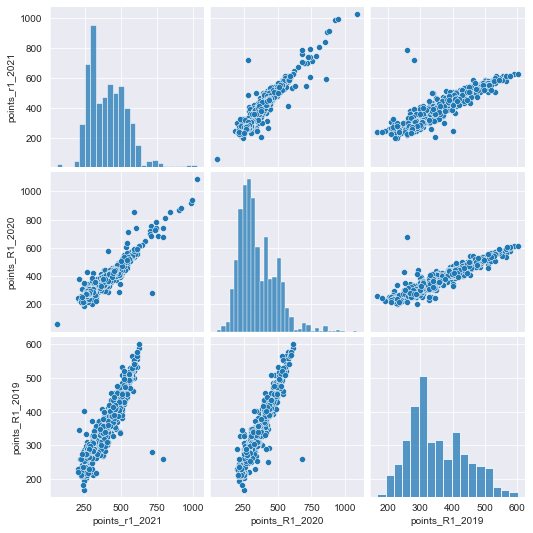

In [145]:
sns.pairplot(allcourses, vars = ['points_r1_2021', 'points_R1_2020', 'points_R1_2019'])

In [146]:
# sns.pairplot(data=allcourses, hue='points_r1_2021')

In [147]:
# import scipy for stats to facilitate kernel density estimate
# import scipy.stats as stats

In [148]:
#Normal distribution.
#def normalpdf(x, mu=0.0, sigma=1.0):
   # """Calculates the PDF of a normal distrubtion."""
   #numer = np.exp(-0.5 * np.square((x - mu) / sigma))
    #denom = sigma * np.sqrt(2.0 * np.pi)
    #return (numer / denom)

In [149]:
# # Extract specific data from allcourses
# #vals = allcourses['points_r1_2021'].to_numpy()[:500]
# vals = allcourses['points_r1_2021'].to_numpy()
                                    

# # Minimum and maximum values.
# low, high = vals.min(), vals.max()

# # Create some space on the x axis.
# diff = high - low
# low = low - diff
# high = high + diff

# # Create some x values.
# # i.e. creating the values on the x axis with sufficient space either side of curve
# x = np.linspace(low, high, 1000)

# # Create a plot.
# fig, ax = plt.subplots()

# # Set the initial previous y values to 0.
# # (could be just set to 0 as 0*X = 0 but just for consistency here as x*0)
# prev = 0 * x

# #loop through the values in vals (sepal length)
# # Select a value from the data.
# for i in vals:
#     # Calculate our y values from x.
#     y = normalpdf(x, mu=i, sigma=0.1)
#     # Add the previous sums of the y values.
#     y = y + prev

#     # Fill between x axis and y. Alpha = translucence
#     ax.fill_between(x, prev, y, alpha=0.3)
    
#     # Update the prev array.
#     prev = y
    

# # Plot the values.
# ax.plot(x, y, 'k-')

In [150]:
# # Extract specific data from allcourses
# #vals = allcourses['points_r1_2020'].to_numpy()[:500]
# vals = allcourses['points_R1_2020'].to_numpy()
                                    

# # Minimum and maximum values.
# low, high = vals.min(), vals.max()

# # Create some space on the x axis.
# diff = high - low
# low = low - diff
# high = high + diff

# # Create some x values.
# # i.e. creating the values on the x axis with sufficient space either side of curve
# x = np.linspace(low, high, 1000)

# # Create a plot.
# fig, ax = plt.subplots()

# # Set the initial previous y values to 0.
# # (could be just set to 0 as 0*X = 0 but just for consistency here as x*0)
# prev = 0 * x

# #loop through the values in vals (sepal length)
# # Select a value from the data.
# for i in vals:
#     # Calculate our y values from x.
#     y = normalpdf(x, mu=i, sigma=0.1)
#     # Add the previous sums of the y values.
#     y = y + prev

#     # Fill between x axis and y. Alpha = translucence
#     ax.fill_between(x, prev, y, alpha=0.3)
    
#     # Update the prev array.
#     prev = y
    

# # Plot the values.
# ax.plot(x, y, 'k-')

In [151]:
# # Extract specific data from allcourses
# #vals = allcourses['points_R1_2019'].to_numpy()[:500]
# vals = allcourses['points_R1_2019'].to_numpy()
                                    

# # Minimum and maximum values.
# low, high = vals.min(), vals.max()

# # Create some space on the x axis.
# diff = high - low
# low = low - diff
# high = high + diff

# # Create some x values.
# # i.e. creating the values on the x axis with sufficient space either side of curve
# x = np.linspace(low, high, 1000)

# # Create a plot.
# fig, ax = plt.subplots()

# # Set the initial previous y values to 0.
# # (could be just set to 0 as 0*X = 0 but just for consistency here as x*0)
# prev = 0 * x

# #loop through the values in vals (sepal length)
# # Select a value from the data.
# for i in vals:
#     # Calculate our y values from x.
#     y = normalpdf(x, mu=i, sigma=0.1)
#     # Add the previous sums of the y values.
#     y = y + prev

#     # Fill between x axis and y. Alpha = translucence
#     ax.fill_between(x, prev, y, alpha=0.3)
    
#     # Update the prev array.
#     prev = y
    

# # Plot the values.
# ax.plot(x, y, 'k-')

In [152]:
# # Importing the required libraries
# from matplotlib import pyplot as plt
# import numpy as np

# # Visualizing the data with multiple bar chart
# plt.figure(figsize=[15, 9])

# # Set the width of the bars
# wd = 0.3
# x_pos = np.arange(1, 2*len(allcourses), 2)

# # Plotting the multiple bar graphs on the same figure
# plt.bar(x_pos, allcourses.points_r1_2021, color='r', width=wd, edgecolor='k',
#         label='points_r1_2021')
# plt.bar(x_pos+wd, allcourses.points_R1_2020, color='y', width=wd, edgecolor='k', 
#         label='points_R1_2020')
# plt.bar(x_pos+(wd*2), allcourses.points_R1_2019, color='c', width=wd, 
#         edgecolor='k', label='points_R1_2019')

# # Add xticks
# plt.xticks(x_pos+wd, allcourses.code.values, fontsize=15)
# plt.yticks(fontsize=15)
# plt.title('CAO Points', fontsize=20)
# plt.xlabel('code', fontsize=17)
# plt.ylabel('points', fontsize=17)

# plt.legend(loc='upper center', fontsize=15)
# plt.show()

In [153]:
# # Importing the required libraries
# from matplotlib import pyplot as plt
# import numpy as np

# # Visualizing the data with stacked bar chart
# plt.figure(figsize=[15, 9])

# # Set the width of the bars
# wd = 0.4
# x_pos = np.arange(len(allcourses))

# # Plotting the multiple bar graphs on top on other
# plt.bar(x_pos, allcourses.points_r1_2021, color='r', width=wd, label='points_r1_2021')
# plt.bar(x_pos, allcourses.points_R1_2020, color='y', width=wd, label='points_R1_2020', 
#        bottom=allcourses.points_r1_2021)
# plt.bar(x_pos, allcourses.points_R1_2019, color='c', width=wd, label='points_R1_2019', 
#        bottom=allcourses.points_r1_2021+allcourses.points_R1_2019)

# # Add xticks
# plt.xticks(x_pos, allcourses.code.values, fontsize=15)
# plt.yticks(fontsize=15)
# plt.title('CAO Points', fontsize=20)
# plt.xlabel('Code', fontsize=17)
# plt.ylabel('Points', fontsize=17)

# plt.legend(loc='upper left', fontsize=15)
# plt.show()

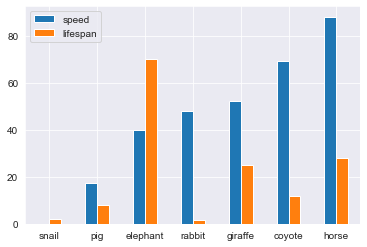

In [154]:
speed = [0.1, 17.5, 40, 48, 52, 69, 88]
lifespan = [2, 8, 70, 1.5, 25, 12, 28]
index = ['snail', 'pig', 'elephant','rabbit', 'giraffe', 'coyote', 'horse']
df = pd.DataFrame({'speed': speed,'lifespan': lifespan}, index=index)
ax = df.plot.bar(rot=0)

In [155]:
# ax = allcourses.plot.bar(rot=0)

##### Read the remainder of the course work
- understand how the years are being concatenated
- add the 2019 course codes
- aim is to have a data frame of 2021,2020,2019  points per common course
- ultimately cannot compare points for courses in one year and not the other two
- but these will need to be explained in readme

<br>

###How to convert pdf to csv in python: <br>
-https://stackover#### Read the remainder of the course work
- understand how the years are being concatenated
- add the 2019 course codes
- aim is to have a data frame of 2021,2020,2019  points per common course
- ultimately cannot compare points for courses in one year and not the other two
- but these will need to be explained in readmeflow.com/questions/49560486/how-to-convert-pdf-to-csv-with-tabula-py

#### iterating through data using regex (itertools)
https://stackabuse.com/pythons-itertools-count-cycle-and-chain/

#### regular expression syntax
https://www.w3schools.com/python/python_regex.asp

https://docs.python.org/3/library/re.html

#### how to use split function
https://pynative.com/python-regex-split/#h-how-to-use-re-split-function

syntax: re.split(pattern, string, maxsplit=0, flags=0)

### Concatenate and Merge dataframes

### how to concatenate with pandas <br>
note 'ignore_index'= True <br>
https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html <br>
how to manage duplicates in a dataframe <br>
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html <br>
how to return uniques in dastaframe columns <br>
https://pandas.pydata.org/docs/reference/api/pandas.Series.unique.html <br>
how to drop duplicates in dataframe <br>
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html

[Pandas concat() tricks you should know to speed up your data analysis](https://towardsdatascience.com/pandas-concat-tricks-you-should-know-to-speed-up-your-data-analysis-cd3d4fdfe6dd#:~:text=Dealing%20with%20index%20and%20axis,-Suppose%20we%20have&text=If%20you%20want%20the%20concatenation,%2C%20%E2%80%A6%2C%20n%2D1%20.&text=To%20concatenate%20DataFrames%20horizontally%20along,set%20the%20argument%20axis%3D1%20.)



##  helper function
### to remove special characters/asterisks
- may not need in pandas

In [156]:
# takes in s (str) - checks is 1st character #? 
#if yes then stores in portfolio a
# otherwise it stores an empty string
def points_to_array(s):
    portfolio = ''
    if s[0] == '#':
        portfolio = '#'
        random = ''
        #checks the last character  if its an asterisk then it stores 
        if s[-1] == '*':
            random = '*'
            # loops through each characters in string for i in s
            # + is string concatenation 
            # + is not addition
        points = ''
        for i in s:
            if i.isdigit():
                points = points + 1
                return [points, portfolio, random]
            
# 'would recommend changing course _points[0], course_points[1]] into arrays with three things in them
#hash character , empty string, points ,random has-
# maybe don't need if read in pandas'